In [18]:
# Task - 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Load datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# To get column names
print(customers.head())
print(products.head())
print(transactions.head())

# Information about data
print(customers.info())
print(products.info())
print(transactions.info())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [20]:
# Data Cleaning
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

transactions = transactions.merge(products, on='ProductID', how='left')
transactions = transactions.merge(customers, on='CustomerID', how='left')

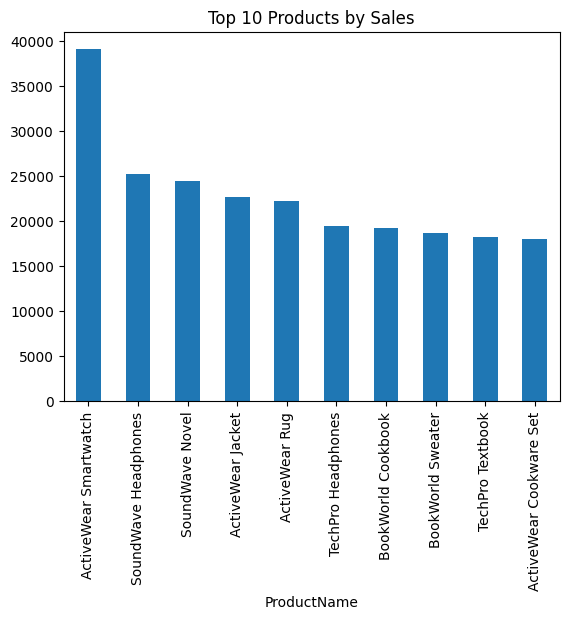

In [21]:
# Top Products
top_products = transactions.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title="Top 10 Products by Sales")
plt.show()

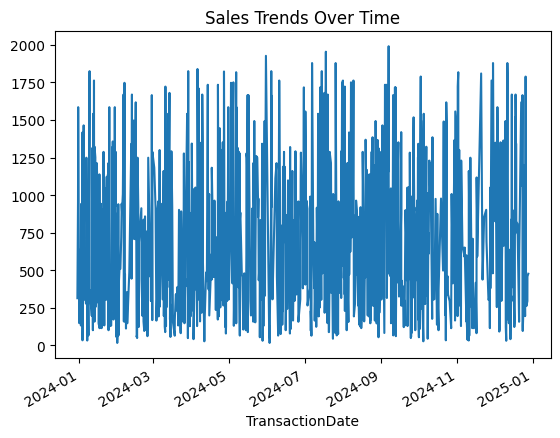

In [22]:
# Sales
sales_trends = transactions.groupby('TransactionDate')['TotalValue'].sum()
sales_trends.plot(title="Sales Trends Over Time")
plt.show()

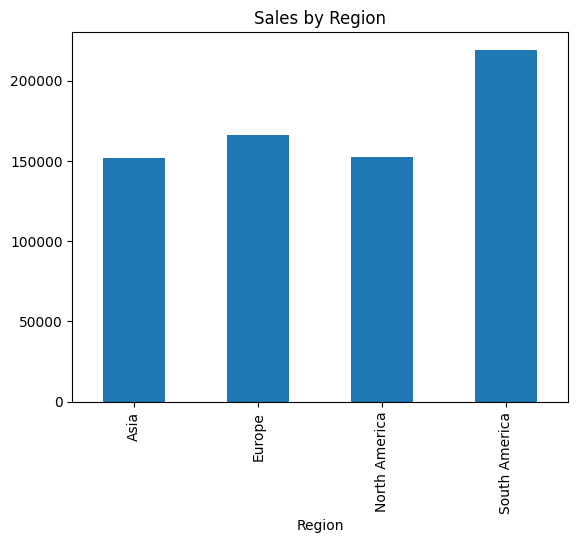

In [23]:
# Sales by region
region_sales = transactions.groupby('Region')['TotalValue'].sum()
region_sales.plot(kind='bar', title="Sales by Region")
plt.show()

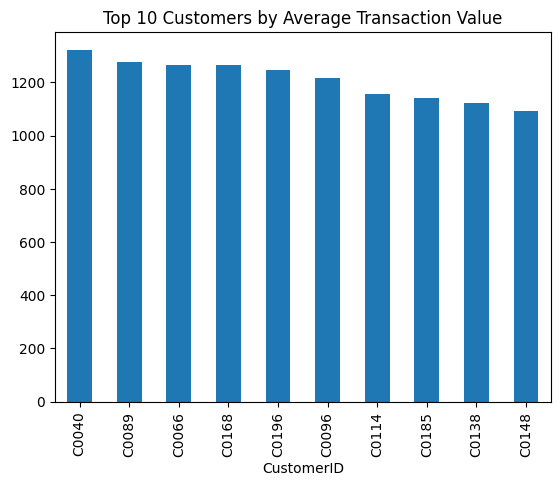

In [24]:
# Top Customers
avg_trans_value = transactions.groupby('CustomerID')['TotalValue'].mean().sort_values(ascending=False).head(10)
avg_trans_value.plot(kind='bar', title="Top 10 Customers by Average Transaction Value")
plt.show()

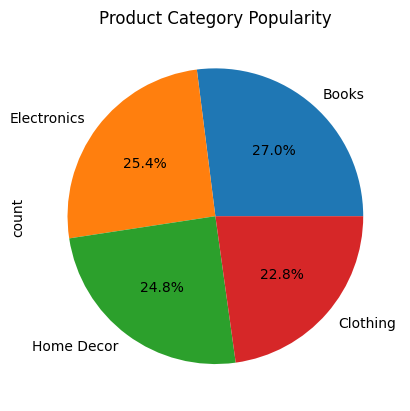

In [25]:
# Popular Product Category
category_popularity = transactions['Category'].value_counts()
category_popularity.plot(kind='pie', autopct='%1.1f%%', title="Product Category Popularity")
plt.show()